In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
import math

In [2]:
# 条件に応じてプロットする点の色を決定する
plt.rcParams["font.family"] =  'Times New Roman'   # 使用するフォント
plt.rcParams["font.size"] = 18
colors = ['blue' if x > 0.5 else 'red' for x in result[:,2].tolist()]
plt.figure(figsize=(10,10))
plt.xlabel(r"$\beta$")
plt.ylabel(r"$\nu$")
#plt.yscale=("log")
plt.scatter(result[:,0],result[:,1],s=20, color=colors)

NameError: name 'result' is not defined

In [7]:
a = np.load("../cpp/max_time_para/max_laminar_time_beta0.49to0.52_nu0.0018to0.003_96times_epsilon0.1_1000period100dump1repeat_laminar0.511579.npy")
size = int(np.sqrt(a.shape[0]))

In [9]:
a

array([[4.90000000e-01, 1.80000000e-03, 3.00000000e+01],
       [4.90000000e-01, 1.81263158e-03, 8.00000000e+01],
       [4.90000000e-01, 1.82526316e-03, 4.00000000e+01],
       ...,
       [5.20000000e-01, 2.97473684e-03, 0.00000000e+00],
       [5.20000000e-01, 2.98736842e-03, 0.00000000e+00],
       [5.20000000e-01, 3.00000000e-03, 0.00000000e+00]])

# ヒートマップ

/var/folders/y0/vyyj6knd79z46hfx26l77w6h0000gn/T/ipykernel_91074/3727826928.py:4: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(a[:,2].reshape(size, size).T)


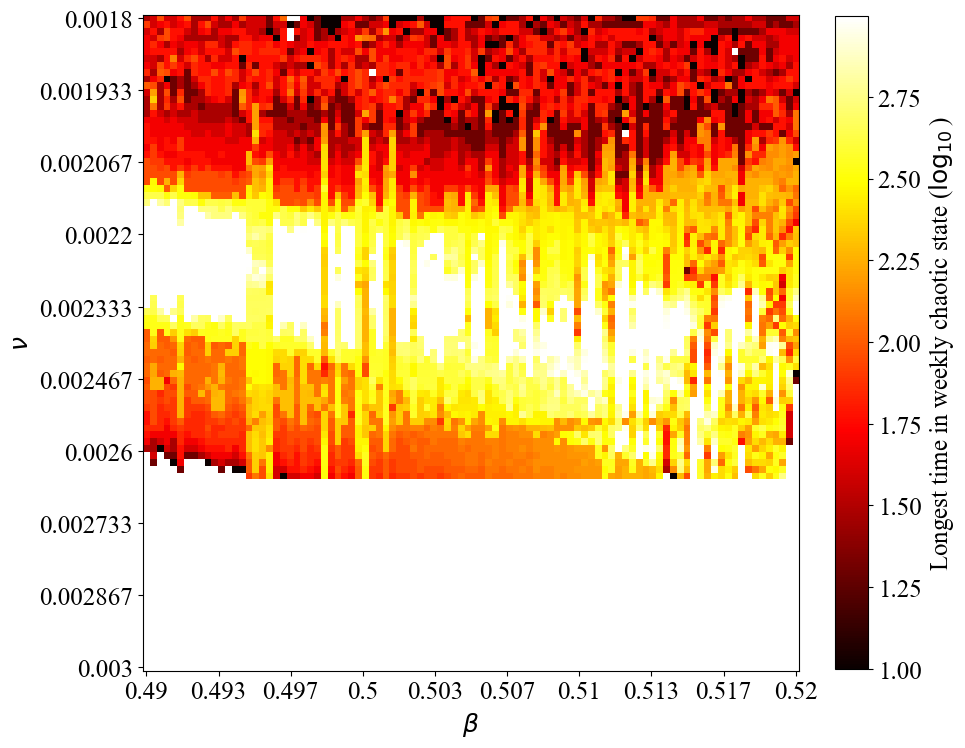

In [8]:
plt.rcParams["font.family"] =  'Times New Roman'   # 使用するフォント
plt.rcParams["font.size"] = 18 
fig, ax = plt.subplots(figsize=(10,10))
data = np.log10(a[:,2].reshape(size, size).T)
# data = (a[:,2].reshape(size, size).T
im = ax.imshow(data, cmap='hot', interpolation='nearest')

xticklabels = np.round(np.linspace(a[0,0], a[-1,0], 10), decimals=3)
ax.set_xticks(np.linspace(0,size-1,10), xticklabels)
yticklabels = np.round(np.linspace(a[0,1], a[size-1,1], 10), decimals=6)
ax.set_yticks(np.linspace(0,size-1,10), yticklabels)

ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$\nu$")
fig.colorbar(im, ax=ax, fraction = 0.045, label=r"Longest time in weekly chaotic state ($\log_{10}$)")
fig.tight_layout()

#fig.savefig(fname=f"../heatmap/average_laminar_time_beta0.41to0.425_nu0.0002to0.00016_100times_epsilon0.1_20000period_latter1laminar0.42.jpeg")

# 曲面

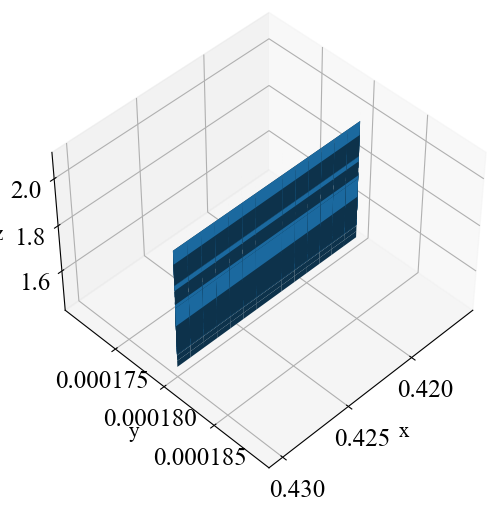

In [624]:
X, Y = np.meshgrid(np.round(np.linspace(a[0,0], a[-1,0], size), decimals=3), np.round(np.linspace(a[0,1], a[size-1,1], size), decimals=5))
Z = np.log10(a[:,2].reshape(size, size))

# Figureと3DAxesを追加
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection="3d")

# 3DAxesの設定
ax.set_xlabel("x", size = 15)
ax.set_ylabel("y", size = 15)
ax.set_zlabel("z", size = 15)
ax.view_init(45, 45)

# 曲面を描画
ax.plot_surface(X, Y, Z)

plt.show()

# プロット

In [1]:
def scaler(value, scale):
    for i in range(scale):
        value = np.log10(value)
    return value

In [30]:
# e = np.load("../cpp/average_time_para/average_laminar_time(line)_beta0.416to0.43_nu0.00018to0.00018_32times_epsilon0.1_1e+08period_latter1laminar0.42.npy")
# f = np.load("../cpp/average_time_para/average_laminar_time(line)_beta0.416to0.4163_nu0.00018to0.00018_96times_epsilon0.1_1e+08period_latter1laminar0.42.npy")
# g = np.load("../cpp/average_time_para/average_laminar_time(line)_beta0.41615to0.41617_nu0.00018to0.00018_32times_epsilon0.1_1e+08period_latter1laminar0.42.npy")
h = np.load("../cpp/average_time_para/average_laminar_time(line)_beta0.416155to0.41618_nu0.00018to0.00018_32times_epsilon0.1_1e+08period10000dump1repeat_floor5e+3laminar0.416.npy")[5:,]
i = np.load("../cpp/average_time_para/average_laminar_time(line)_beta0.41618to0.417_nu0.00018to0.00018_64times_epsilon0.1_1e+07period10000dump1repeat_floor5e+3laminar0.416.npy")[:-20,]
j = np.load("../cpp/average_time_para/average_laminar_time(line)_beta0.41614to0.416165_nu0.00018to0.00018_32times_epsilon0.1_1e+09period10000dump1repeat_floor3e+3laminar0.416.npy")[24:,]
k = np.load("../cpp/average_time_para/average_laminar_time(line)_beta0.416162to0.416165_nu0.00018to0.00018_32times_epsilon0.1_1e+08period10000dump5repeat_floor5000_laminar0.416.npy")
l = np.load("../cpp/average_time_para/average_laminar_time(line)_beta0.416159to0.416162_nu0.00018to0.00018_30times_epsilon0.1_1e+09period10000dump1repeat_floor5000_laminar0.416.npy")
concatenated = np.concatenate((h, i, j, k, l), axis = 0)
data = concatenated[np.argsort(concatenated[:, 0])]
k_1 = 1
k_2 = 1
crisis = 0
end = -1 #論文の広い方は-60
x_log = 1
y_log = 2

supportX = np.array([math.pow(10, i) for i in np.linspace(-3.9, -3.1, 100)])
supportY = k_1 * np.exp(supportX ** (-1/2) * k_2)

X = abs(data[crisis:end, 0]) - 4.1615e-01
# X = abs(data[crisis:end, 0])
Y = data[crisis:end, 2]

In [229]:
data[np.where(np.isnan(data))[0],]

array([], shape=(0, 3), dtype=float64)

# nu固定

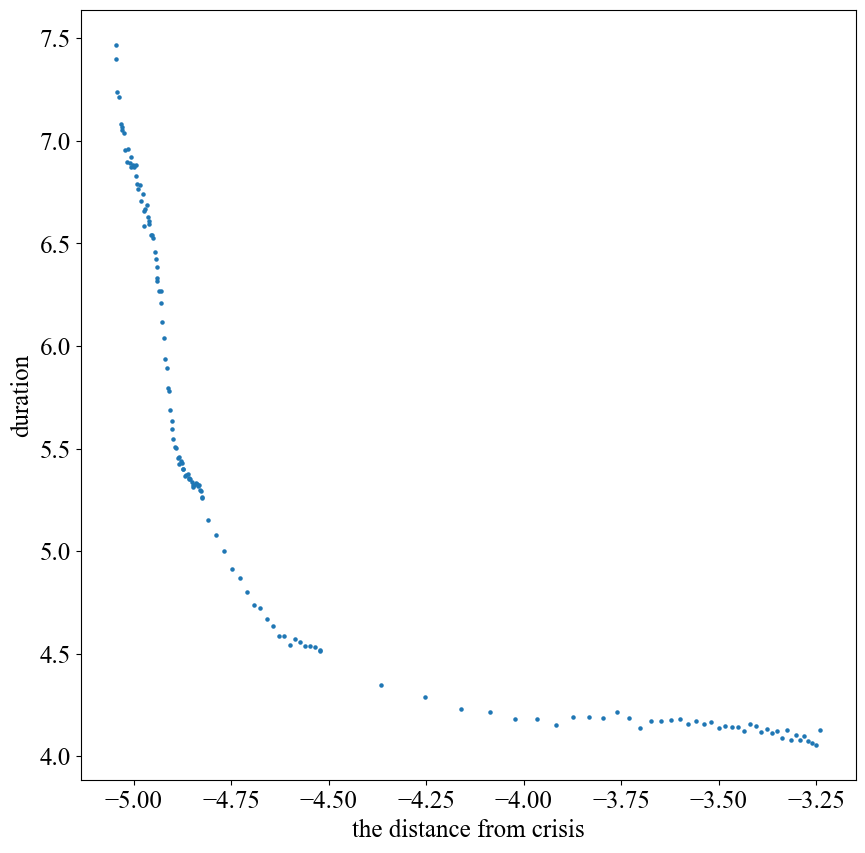

In [32]:
plt.rcParams["font.family"] =  'Times New Roman'   # 使用するフォント
plt.rcParams["font.size"] = 18 
fig, ax = plt.subplots(figsize=(10,10))


ax.scatter(scaler(X, x_log), scaler(Y, y_log),s=5)
ax.set_xlabel(r"the distance from crisis")
ax.set_ylabel(r"duration")
fig.savefig(fname=f"../distribution/average_time_dist_loglog_.png")

In [17]:
X_tra = scaler(X, x_log)
Y_tra = scaler(Y, y_log)
#回帰分析
coef_and_X = np.ones((X_tra.shape[0], 2))
coef_and_X[:, 1] = X_tra
# 最小二乗法による回帰係数の計算
beta = np.linalg.inv(coef_and_X.T @ coef_and_X) @ coef_and_X.T @ Y_tra
print(f"定数:{beta[0]}, 係数:{beta[1]}")
# 予測値の計算
Y_pred = coef_and_X @ beta

定数:-2.6803453573205784, 係数:-0.7031223016783201


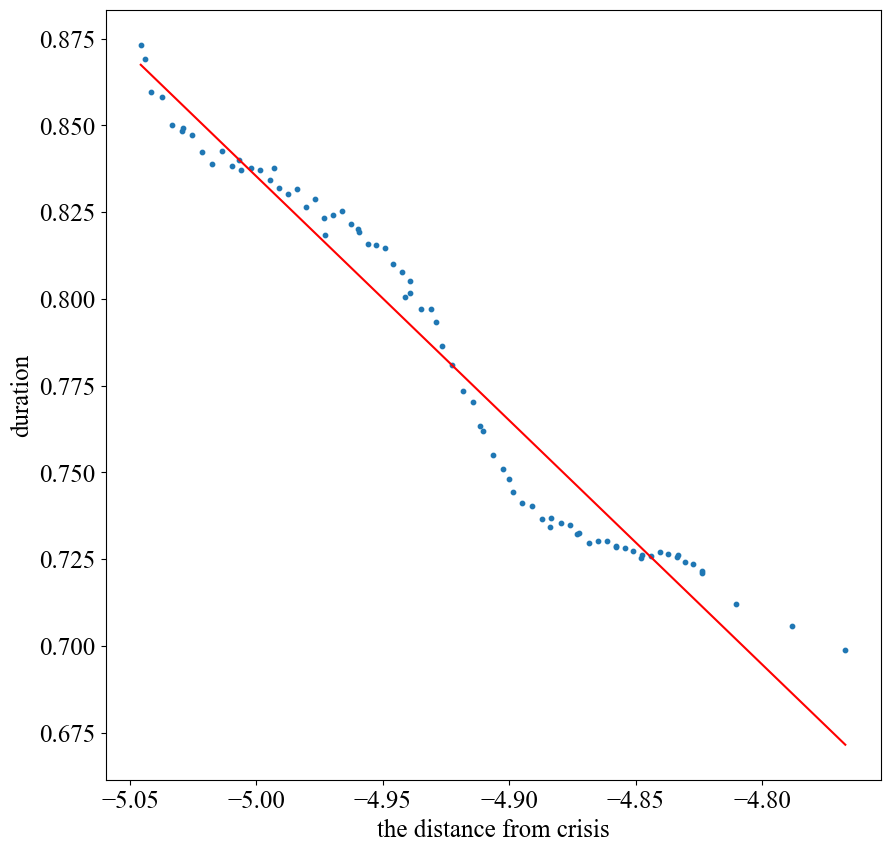

In [27]:
plt.rcParams["font.family"] =  'Times New Roman'   # 使用するフォント
plt.rcParams["font.size"] = 18 
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("the distance from crisis")
ax.set_ylabel("duration")
ax.scatter(scaler(X, x_log), scaler(Y, y_log),s=10)
ax.plot(X_tra, Y_pred, c="r", label="OLS")
# ax.plot(X_tra, -X_tra/2-1.7)
fig.savefig("../distribution/laminar_persistent_regression.png")

# beat固定

In [1]:
def scaler(value, scale):
    for i in range(scale):
        value = np.log10(value)
    return value

In [15]:
a = np.load("../cpp/average_time_para/average_laminar_time(line)_beta0.5to0.5_nu0.0019to0.0025_96times_epsilon0.1_100000period1000dump1repeat_floor0_laminar0.5.npy")
# concatenated = np.concatenate((a), axis = 0)
# data = concatenated[np.argsort(concatenated[:, 0])]
data = a
k_1 = 1
k_2 = 1
crisis = 0
end = -1 #論文の広い方は-60
x_log = 1
y_log = 2

supportX = np.array([math.pow(10, i) for i in np.linspace(-3.9, -3.1, 100)])
supportY = k_1 * np.exp(supportX ** (-1/2) * k_2)

X = abs(data[crisis:end, 0]) - 4.1615e-01
# X = abs(data[crisis:end, 0])
Y = data[crisis:end, 2]

In [17]:
data[np.where(np.isnan(data))[0],]

array([[0.5       , 0.0019    ,        nan],
       [0.5       , 0.00190632,        nan],
       [0.5       , 0.00191263,        nan],
       [0.5       , 0.00191895,        nan],
       [0.5       , 0.00192526,        nan],
       [0.5       , 0.00193158,        nan],
       [0.5       , 0.00193789,        nan],
       [0.5       , 0.00194421,        nan],
       [0.5       , 0.00195053,        nan],
       [0.5       , 0.00195684,        nan],
       [0.5       , 0.00196316,        nan],
       [0.5       , 0.00196947,        nan],
       [0.5       , 0.00197579,        nan],
       [0.5       , 0.00198211,        nan],
       [0.5       , 0.00198842,        nan],
       [0.5       , 0.00199474,        nan],
       [0.5       , 0.00200105,        nan],
       [0.5       , 0.00200737,        nan],
       [0.5       , 0.00201368,        nan],
       [0.5       , 0.00202   ,        nan],
       [0.5       , 0.00202632,        nan],
       [0.5       , 0.00203263,        nan],
       [0.

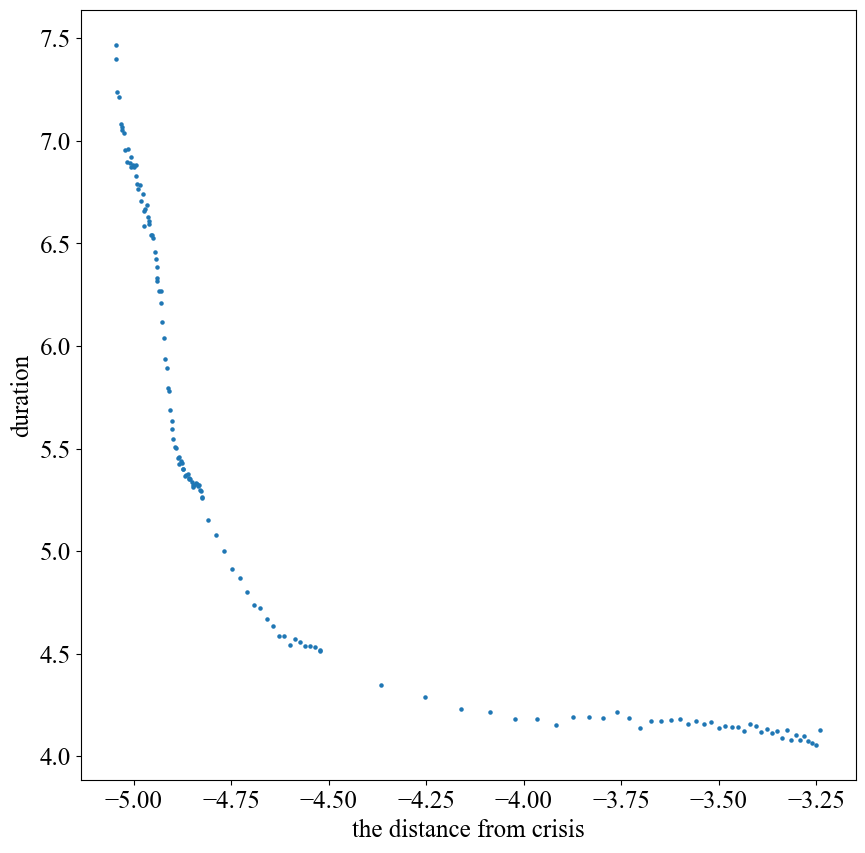

In [32]:
plt.rcParams["font.family"] =  'Times New Roman'   # 使用するフォント
plt.rcParams["font.size"] = 18 
fig, ax = plt.subplots(figsize=(10,10))


ax.scatter(scaler(X, x_log), scaler(Y, y_log),s=5)
ax.set_xlabel(r"the distance from crisis")
ax.set_ylabel(r"duration")
fig.savefig(fname=f"../distribution/average_time_dist_loglog_.png")

In [17]:
X_tra = scaler(X, x_log)
Y_tra = scaler(Y, y_log)
#回帰分析
coef_and_X = np.ones((X_tra.shape[0], 2))
coef_and_X[:, 1] = X_tra
# 最小二乗法による回帰係数の計算
beta = np.linalg.inv(coef_and_X.T @ coef_and_X) @ coef_and_X.T @ Y_tra
print(f"定数:{beta[0]}, 係数:{beta[1]}")
# 予測値の計算
Y_pred = coef_and_X @ beta

定数:-2.6803453573205784, 係数:-0.7031223016783201


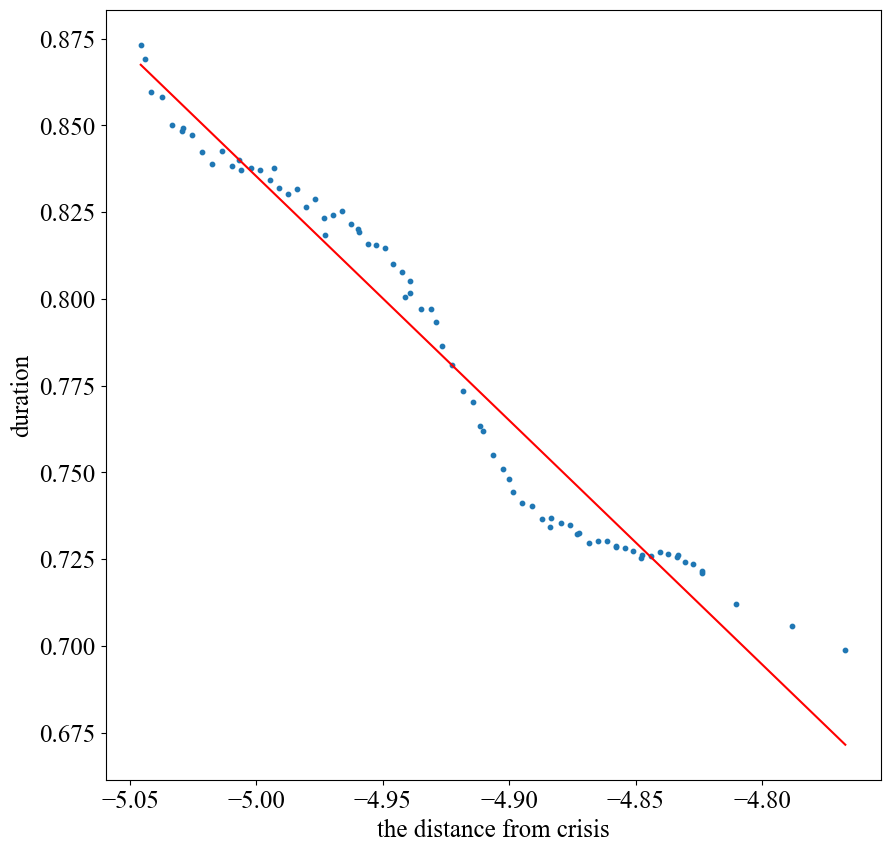

In [27]:
plt.rcParams["font.family"] =  'Times New Roman'   # 使用するフォント
plt.rcParams["font.size"] = 18 
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("the distance from crisis")
ax.set_ylabel("duration")
ax.scatter(scaler(X, x_log), scaler(Y, y_log),s=10)
ax.plot(X_tra, Y_pred, c="r", label="OLS")
# ax.plot(X_tra, -X_tra/2-1.7)
fig.savefig("../distribution/laminar_persistent_regression.png")

# 時系列

In [97]:
a = np.load("../cpp_codes/generated_laminar_beta_0.418nu_0.000173_20000period1500check400progresseps0.1.npy")

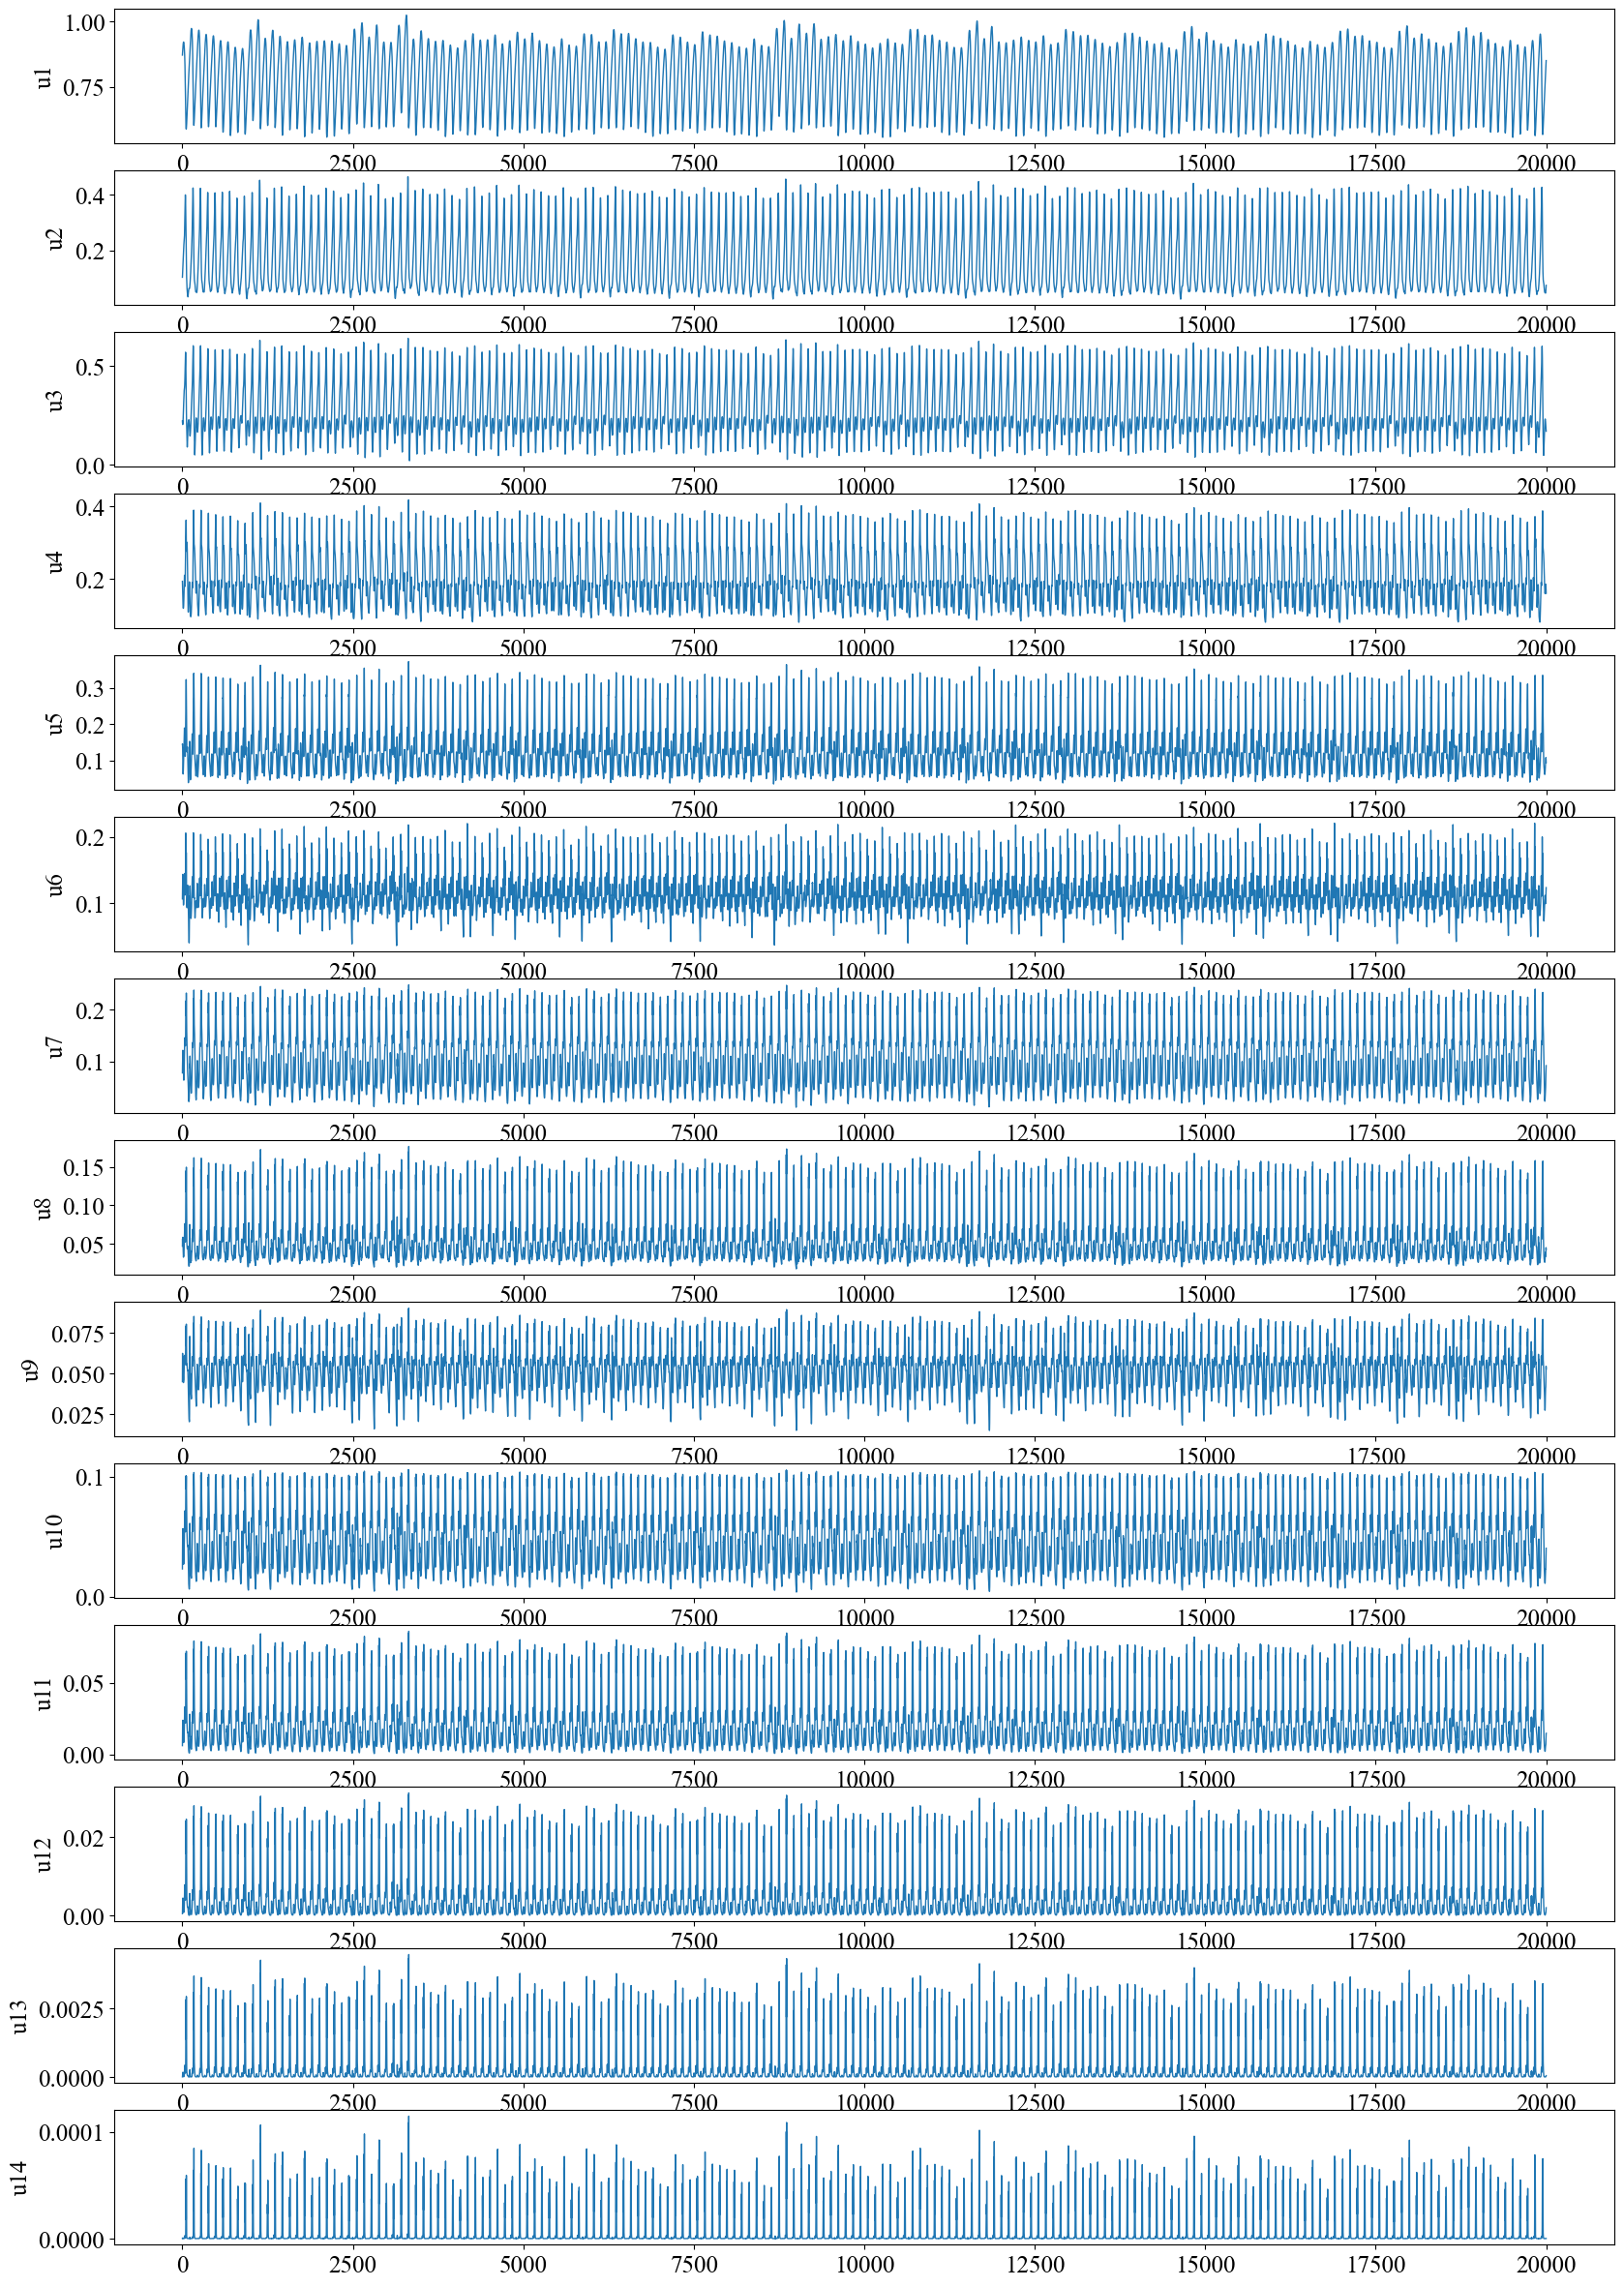

In [98]:
plt.figure(figsize=(20,30))
for i in range(a.shape[0]-1):
    plt.subplot(a.shape[0]-1,1,i+1)
    plt.ylabel(f"u{i+1}")
    #plt.yscale=("log")
    plt.plot(np.real(a[-1,:]),abs(a[i,:]),lw=1)
